**Week 5: Due Thursday Sept 23 11:59pm**
<hr style="height: 3.0px"/>

**Problem 1:**  Reproduce the scatter plot from image file "crystallization kinetics poly testing 48 2015 p 125.png" with the following requirements: 
1. You need to include at least 3 of the data sets (three different temperatures)
2. Each data set (temperature) should be in a different color
3. Add labels to the x & y axes.  
4. Set your x & y min,max values to correspond to the image plot 

**Problem 2:** Replot your data from problem 1 where the y-axis is log(−𝑙𝑛(1−𝑋𝑡)) and the x-axis is log(t).  Plot this in two different ways.  (1) Your fist plot should be −𝑙𝑛(1−𝑋𝑡) vs t on a log-log plot and your (2) second plot should be (log(t), log(−𝑙𝑛(1−𝑋𝑡))) on a linear-linear plot (i.e. a simple scatter plot).  Be careful here with the log and ln functions.  The default np.log() function is actually base e.  
1. Remember Xt corresponds to the fraction of crystallinity, i.e. 60% corresponds to Xt=0.6
2. label your axes
3. plot all 3 data sets from problem 1

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import os
import sympy as sym
from sympy import solve

## Get pixel data (last weeks homework):

<IPython.core.display.Javascript object>


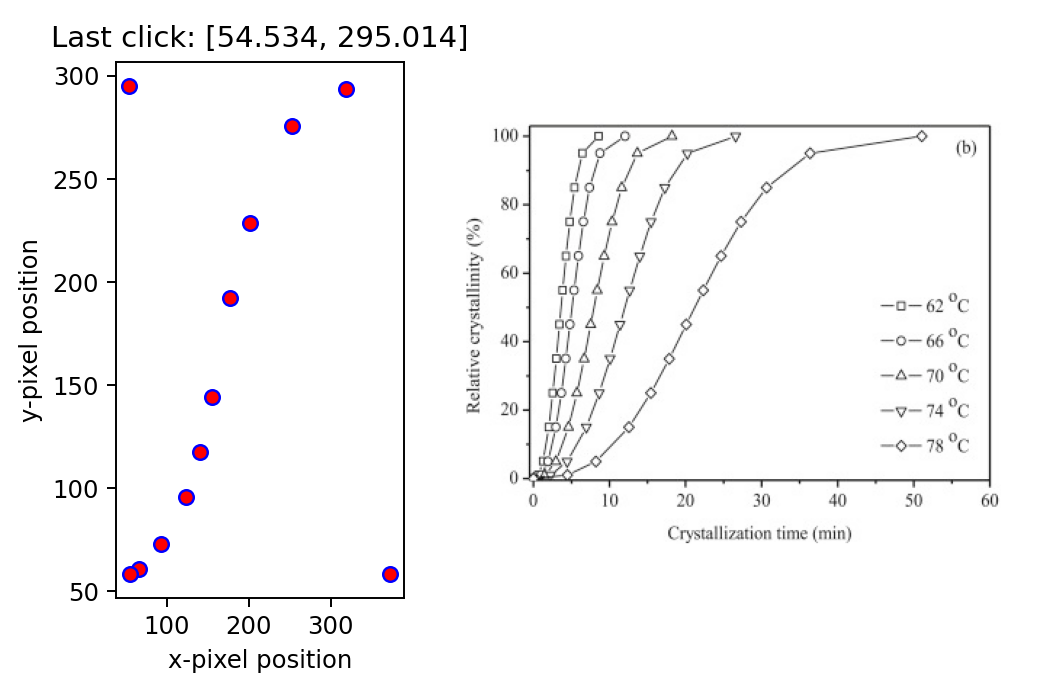

In [68]:
%matplotlib notebook

#now we have 1 row and 2 columns i.e. 2 figures in a row
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(6, 4), gridspec_kw={'width_ratios': [1, 2]})
ax2.axis(False)

# we use matplotlib.imread to read our image file and imshow to display it.
path=r'.'
filename ='crystallization kinetics poly testing 48 2015 p 125.png'
img = mpimg.imread(os.path.join(path, filename)) 
ax2=plt.imshow(img)
#notice above we asigned the image to ax2 which is the image on the right

# recall from part 1 that image files have coord in left top corner so we need to correct by the y-dimension of the file
ydim=img.shape[0]

# setting title and labels for ax1 (figure on the left)
ax1.set_title('Click on data in figure to the right')
ax1.set_xlabel('x-pixel position')
ax1.set_ylabel('y-pixel position')

pos = []
def onclick(event):
    pos.append([event.xdata,ydim-event.ydata])
    ax1.set_title(f'Last click: [{event.xdata:.3f}, {ydim-event.ydata:.3f}]')
    ax1.scatter(event.xdata, ydim-event.ydata,marker='o', c='r', edgecolor='b') #adding scatter plot
    
fig.canvas.mpl_connect('button_press_event', onclick) 
fig.tight_layout()
fig.show()

In [82]:
# points (60,0), (0,0), and (0.100) located at pixels:
pos[-3:]

[[372.919676891027, 58.63674773363141],
 [55.74000822694535, 58.63674773363141],
 [54.534001882214966, 295.0139913007798]]

## Calibrate Conversion from pixels to plot units (this weeks lesson)

In [ ]:
# define variables
m11, m12, m21, m22, Ox, Oy = sym.symbols('m11, m12, m21, m22, Ox, Oy')
# define transformation matrix and offset matrix
m = sym.Matrix([[m11, m12],[m21, m22]])
offset=sym.Matrix([Ox,Oy])

# *************Need to change calibration points below**********
# our six equations (3 sets of 2) are:  (remember each of these are set to zero by the solve function) 
eq1=m*(sym.Matrix([371.6, 59.1])-offset)-sym.Matrix([60, 0])
eq2=m*(sym.Matrix([56.1, 60.2])-offset)-sym.Matrix([0, 0])
eq3=m*(sym.Matrix([55.1, 296.2])-offset)-sym.Matrix([0,100])

sol=solve([eq1,eq2,eq3])
calib_param=sol[0] # [0] removing extra set of parenthesis

m_cal=m.subs(calib_param) # get the calibrated transformation matrix, m_cal
offset_cal=offset.subs(calib_param) # get the calibrated offset, offset_cal

# let's convert these sympy matrices to numpy arrays for our calculations
m_cal=np.array(m_cal).astype(np.float64) 
offset_cal=np.array(offset_cal).astype(np.float64)

## Convert pixel data to plot data (this week's lesson)

In [83]:
pos=pos[0:-3] # if last three points were calibration values
# apply offset matrix to all pixel points
offset_pos=pos-offset_cal.flatten()

# now dot m_cal matrix with each offset pixel value
data=np.array([np.dot(m_cal,i) for i in offset_pos]) #using comprehension rather than for loop
display(data)
#***************data is now calibrated********

array([[50.15190486, 99.37603243],
       [37.52281143, 91.61263051],
       [27.8520066 , 71.60773833],
       [23.23575467, 56.24128849],
       [18.83913915, 35.76634849],
       [16.06550062, 24.50236983],
       [12.8370398 , 15.2789365 ],
       [ 7.08470397,  5.52487717],
       [ 2.02917923,  0.37540765]])

## plot data to check our conversion

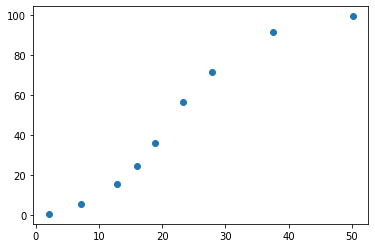

In [87]:
%matplotlib inline
# plot our converted data
xdata=data[:,0] #skip last three points - these were the axis calib pts
ydata=data[:,1]
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
plt.show()

## Performing math operations on our data (this homework)

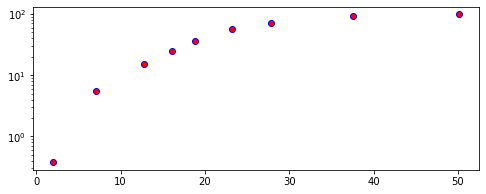

In [90]:
fig, ax2 = plt.subplots(nrows=1, ncols=1,figsize=(8, 3))
data=np.array(data)
#set the scatter plot for axes 3_2 i.e. the right plot
ax2.scatter(data[:,0],data[:,1],marker='o', c='r', edgecolor='b');
#ax2.scatter(data[:,0],2*data[:,1],marker='o', c='y', edgecolor='b');
# ax2.set_xlabel('Crystallization time, min')
# ax2.set_ylabel('Crystallinity, %');
# ax2.set_xlim(0,60)
#ax2.set_ylim(0.01,10)
ax2.set_yscale('log')
 
plt.show()

we want to plot:  log(t), log(−𝑙𝑛(1−𝑋𝑡))      
−𝑙𝑛(1−𝑋𝑡) vs t on a log-log plot  
(log(t), log(−𝑙𝑛(1−𝑋𝑡))) on linear plot

In [96]:
Xt=data[:,1]/100
t=data[:,0]
display(Xt)

array([0.99376032, 0.91612631, 0.71607738, 0.56241288, 0.35766348,
       0.2450237 , 0.15278937, 0.05524877, 0.00375408])

In [97]:
-np.log(1-Xt)

array([5.07682708e+00, 2.47844324e+00, 1.25905355e+00, 8.26479473e-01,
       4.42642946e-01, 2.81068919e-01, 1.65805932e-01, 5.68336366e-02,
       3.76114068e-03])

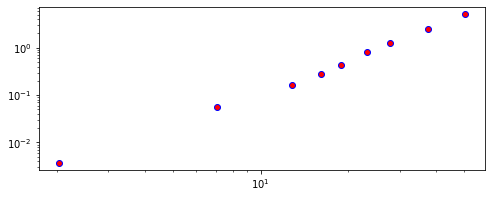

In [98]:
fig, ax2 = plt.subplots(nrows=1, ncols=1,figsize=(8, 3))

#set the scatter plot for axes 3_2 i.e. the right plot
ax2.scatter(t,-np.log(1-Xt),marker='o', c='r', edgecolor='b');

ax2.set_yscale('log')
ax2.set_xscale('log') 
plt.show()

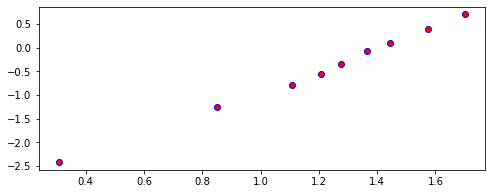

In [99]:
fig, ax2 = plt.subplots(nrows=1, ncols=1,figsize=(8, 3))

#set the scatter plot for axes 3_2 i.e. the right plot
ax2.scatter(np.log10(t),np.log10(-np.log(1-Xt)),marker='o', c='r', edgecolor='b');

plt.show()